In [1]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from keras.callbacks import *
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import keras.callbacks as callbacks

Using TensorFlow backend.


In [22]:
%run -i "./Utils.ipynb"
%run -i "./Modelos.ipynb"

In [3]:
file = 'UScommentsClean.csv'
top_words = 10000
embedding_size = 32
max_len = 500
tensor_board_cb = callbacks.TensorBoard(log_dir = "./logs/")

<h2>Generate Data</h2>

In [4]:
X_data, y_data = load_dataset(file, top_words = top_words, pad_len = max_len)

10000
10000


In [5]:
classes = y_data.shape[1]

## Train-Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

## Balancing data with SMOTE

In [7]:
y_train_compact = y_train.copy()
y_train_compact = pd.DataFrame(y_train_compact)
y_train_compact = y_train_compact[1]
balancer = SMOTE()
x_resampled, y_resampled = balancer.fit_sample(X_train, y_train_compact)
y_resampled = to_categorical(y_resampled)

In [8]:
early_stop = EarlyStopping(monitor='val_loss',
                           min_delta=1e-6, 
                           patience=3, 
                           verbose=0, 
                           mode='auto', 
                           baseline=None)

## MPL

Train on 24376 samples, validate on 1603 samples
Epoch 1/10
24376/24376 [==============================] - 61s 3ms/step - loss: 0.3304 - acc: 0.8419 - val_loss: 0.1843 - val_acc: 0.9158
Epoch 2/10
24376/24376 [==============================] - 60s 2ms/step - loss: 0.1490 - acc: 0.9436 - val_loss: 0.1770 - val_acc: 0.9339
Epoch 3/10
24376/24376 [==============================] - 56s 2ms/step - loss: 0.0878 - acc: 0.9703 - val_loss: 0.2221 - val_acc: 0.9339
Epoch 4/10
24376/24376 [==============================] - 60s 2ms/step - loss: 0.0529 - acc: 0.9831 - val_loss: 0.3782 - val_acc: 0.8989
Epoch 5/10
6870/6870 [==============================] - 1s 179us/step
Accuracy (test set): 0.9556040756393555


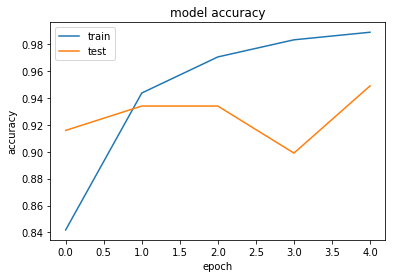

In [9]:
m_mlp = model_training(mlp_model(250, classes, top_words + 1, embedding_size, max_len), [x_resampled, y_resampled], [X_test, y_test], [X_val, y_val], 10, [early_stop, tensor_board_cb], 'mpl_weights')

In [10]:
y_pred = m_mlp.predict(X_test)

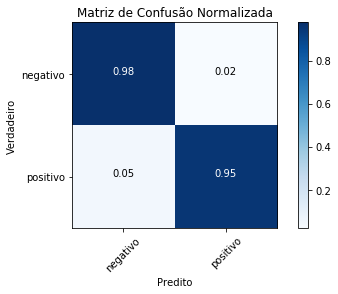

In [11]:
class_names = ['negativo', 'positivo']

cnf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matriz de Confusão Normalizada')

plt.show()

In [12]:
word_to_id = np.load('word_to_id.npy').tolist()
new_sample = transform_comment('the worst movie ever made', word_to_id, max_len)

C:\Anaconda3\lib\re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


In [13]:
pred = m_mlp.predict(new_sample)[0]
i = np.argmax(pred)
sentiment = class_names[i]
conf = np.round(pred[i] * 100, 2)


print("O review 'the worst movie ever made' foi considerado " + sentiment + " com {}% de confiança".format(conf))

O review 'the worst movie ever made' foi considerado negativo com 100.0% de confiança


## CNN

Train on 24376 samples, validate on 1603 samples
Epoch 1/10
24376/24376 [==============================] - 45s 2ms/step - loss: 0.2879 - acc: 0.8639 - val_loss: 0.2163 - val_acc: 0.9070
Epoch 2/10
24376/24376 [==============================] - 44s 2ms/step - loss: 0.1163 - acc: 0.9571 - val_loss: 0.1573 - val_acc: 0.9401
Epoch 3/10
24376/24376 [==============================] - 50s 2ms/step - loss: 0.0496 - acc: 0.9826 - val_loss: 0.2238 - val_acc: 0.9382
Epoch 4/10
24376/24376 [==============================] - 49s 2ms/step - loss: 0.0217 - acc: 0.9930 - val_loss: 0.4007 - val_acc: 0.9170
Epoch 5/10
6870/6870 [==============================] - 3s 367us/step
Accuracy (test set): 0.9215429403202329


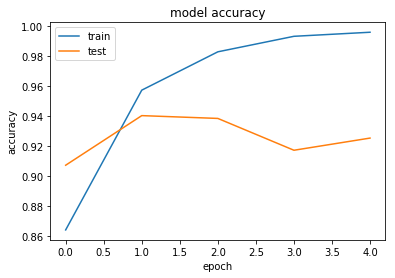

In [14]:
m_cnn = model_training(cnn_model(32, 3, 250, 2, top_words + 1, embedding_size, max_len), [x_resampled, y_resampled], [X_test, y_test], [X_val, y_val], 10, [early_stop], 'cnn_weights')

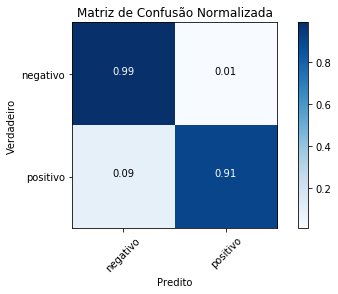

In [15]:
y_pred = m_cnn.predict(X_test)
class_names = ['negativo', 'positivo']

cnf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matriz de Confusão Normalizada')

plt.show()

In [16]:
word_to_id = np.load('word_to_id.npy').tolist()
new_sample = transform_comment('the worst movie ever made', word_to_id, max_len)

C:\Anaconda3\lib\re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


In [17]:
pred = m_cnn.predict(new_sample)[0]
i = np.argmax(pred)
sentiment = class_names[i]
conf = np.round(pred[i] * 100, 2)

print("O review 'the worst movie ever made' foi considerado " + sentiment + " com {}% de confiança".format(conf))

O review 'the worst movie ever made' foi considerado negativo com 100.0% de confiança


## LSTM

In [23]:
m_lstm = model_training(lstm_model(100, classes, top_words + 1, embedding_size, max_len), [x_resampled, y_resampled], [X_test, y_test], [X_val, y_val], 10, [early_stop], 'lstm_weight')

Train on 24376 samples, validate on 1603 samples
Epoch 1/10
24376/24376 [==============================] - 232s 10ms/step - loss: 0.6932 - acc: 0.5077 - val_loss: 0.7138 - val_acc: 0.1341
Epoch 2/10
23808/24376 [============================>.] - ETA: 5s - loss: 0.6933 - acc: 0.4985

KeyboardInterrupt: 

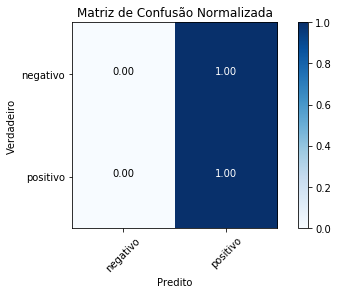

In [19]:
y_pred = m_lstm.predict(X_test)
class_names = ['negativo', 'positivo']

cnf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matriz de Confusão Normalizada')

plt.show()

In [20]:
word_to_id = np.load('word_to_id.npy').tolist()
new_sample = transform_comment('the worst movie ever made', word_to_id, 100)
pred = m_lstm.predict(new_sample)[0]
i = np.argmax(pred)
sentiment = class_names[i]
conf = np.round(pred[i] * 100, 2)

print("O review 'the worst movie ever made' foi considerado " + sentiment + " com {}% de confiança".format(conf))

C:\Anaconda3\lib\re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


ValueError: Error when checking input: expected embedding_3_input to have shape (500,) but got array with shape (100,)

In [ ]:
m_mlp.summary()

In [ ]:
m_cnn.summary()

In [ ]:
m_